In [1]:
from google.colab import files
files.upload()

Saving haberman.csv to haberman.csv


{'haberman.csv': b'30,64,1,1\n30,62,3,1\n30,65,0,1\n31,59,2,1\n31,65,4,1\n33,58,10,1\n33,60,0,1\n34,59,0,2\n34,66,9,2\n34,58,30,1\n34,60,1,1\n34,61,10,1\n34,67,7,1\n34,60,0,1\n35,64,13,1\n35,63,0,1\n36,60,1,1\n36,69,0,1\n37,60,0,1\n37,63,0,1\n37,58,0,1\n37,59,6,1\n37,60,15,1\n37,63,0,1\n38,69,21,2\n38,59,2,1\n38,60,0,1\n38,60,0,1\n38,62,3,1\n38,64,1,1\n38,66,0,1\n38,66,11,1\n38,60,1,1\n38,67,5,1\n39,66,0,2\n39,63,0,1\n39,67,0,1\n39,58,0,1\n39,59,2,1\n39,63,4,1\n40,58,2,1\n40,58,0,1\n40,65,0,1\n41,60,23,2\n41,64,0,2\n41,67,0,2\n41,58,0,1\n41,59,8,1\n41,59,0,1\n41,64,0,1\n41,69,8,1\n41,65,0,1\n41,65,0,1\n42,69,1,2\n42,59,0,2\n42,58,0,1\n42,60,1,1\n42,59,2,1\n42,61,4,1\n42,62,20,1\n42,65,0,1\n42,63,1,1\n43,58,52,2\n43,59,2,2\n43,64,0,2\n43,64,0,2\n43,63,14,1\n43,64,2,1\n43,64,3,1\n43,60,0,1\n43,63,2,1\n43,65,0,1\n43,66,4,1\n44,64,6,2\n44,58,9,2\n44,63,19,2\n44,61,0,1\n44,63,1,1\n44,61,0,1\n44,67,16,1\n45,65,6,2\n45,66,0,2\n45,67,1,2\n45,60,0,1\n45,67,0,1\n45,59,14,1\n45,64,0,1\n45,68,0,1\

In [0]:
# Importing Required Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read the dataset

data = pd.read_csv("haberman.csv")

data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [10]:
# The column names are missing, we have to label them accordingly  to perform EDA well

data.columns = ['age','operation_year','axil_nodes','survival_status']
print(data.columns)

# To check the shape of our dataset

print(data.shape)
print(data.head())

Index(['age', 'operation_year', 'axil_nodes', 'survival_status'], dtype='object')
(305, 4)
   age  operation_year  axil_nodes  survival_status
0   30              62           3                1
1   30              65           0                1
2   31              59           2                1
3   31              65           4                1
4   33              58          10                1


In [11]:
#(Q) How many data points for each class are present? 
data["survival_status"].value_counts()

1    224
2     81
Name: survival_status, dtype: int64

Observations:

1. This dataset is having 305 training examples, having 3 features with 1 class-label column.

2.  Column "survival_status" contains 2 labels, i.e. label-1 denotes the patient survived 5 years or longer after the operation and label 2 which denotes the patient died within 5 years.

3. The dataset is imbalance which we have find out using value_counts method. The number of observations in each class 1 is 224 and in class 2 is 81. Number of training examples are not equal.





**OBJECTIVE:** Its basically a classification problem. We have to find the life span of the said patient after he/she has been operated.

# UNI-VARIATE Analysis

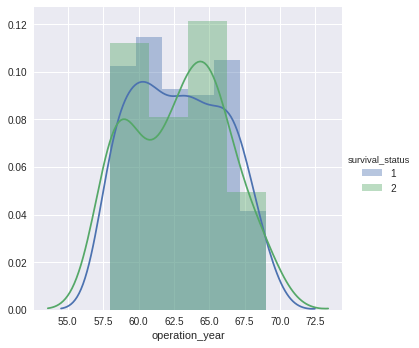

In [12]:
# Distribution of operation_year feature column
sns.FacetGrid(data, hue="survival_status", size=5).map(sns.distplot, "operation_year").add_legend()
plt.show()

Observations: There is overlapping of the two curves.  

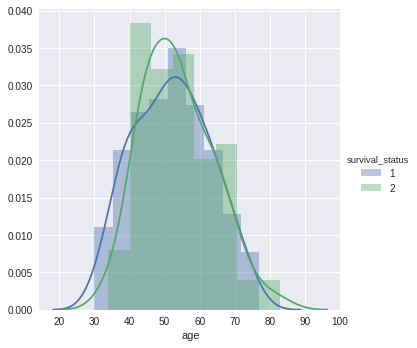

In [13]:
# Distribution of Age feature column
sns.FacetGrid(data, hue="survival_status", size=5).map(sns.distplot, "age").add_legend()
plt.show()

Observation : the two curves are highly overlapping similar to the previous plot

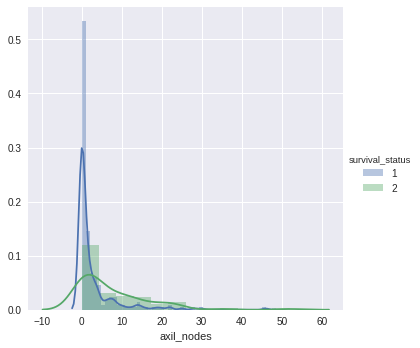

In [14]:
# Distribution of axil_nodes column

sns.FacetGrid(data, hue="survival_status", size=5).map(sns.distplot, "axil_nodes").add_legend()
plt.show()



Observation: All the three histograms are highly overlapped, unable to draw conclusions

In [0]:
# It will be useful if classify our dataset on the survival status of the patient

survived = data.loc[data["survival_status"] == 1];
died = data.loc[data["survival_status"] == 2];

**Probability Density Function and Cummulative Density Functioon**

[0.73214286 0.10267857 0.02678571 0.05357143 0.01339286 0.00892857
 0.02232143 0.00446429 0.00892857 0.00892857 0.00446429 0.
 0.00446429 0.00446429 0.         0.         0.         0.
 0.         0.00446429]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]
[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


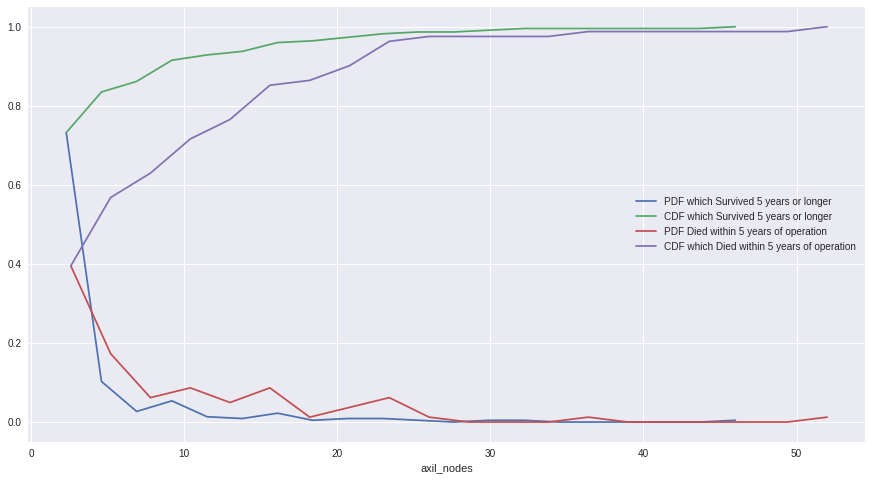

In [20]:
plt.figure(figsize=(15,8))

# (a) Plot of CDF and PDF of axil_nodes for two classes.

# Survived 5 years or longer 
counts, bin_edges = np.histogram(survived['axil_nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = "PDF which Survived 5 years or longer ")
plt.plot(bin_edges[1:], cdf, label = "CDF which Survived 5 years or longer ")


# Died within 5 years of operation
counts, bin_edges = np.histogram(died['axil_nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "PDF Died within 5 years of operation")
plt.plot(bin_edges[1:], cdf, label = "CDF which Died within 5 years of operation")
plt.legend(loc = 'best')
plt.xlabel("axil_nodes")

plt.show();

Observation : There is a high chance of survival of the patients, having axial nodes less than 22, will be lived for 5 yrs or more than that

[0.01785714 0.03125    0.04464286 0.0625     0.04464286 0.08035714
 0.04017857 0.05357143 0.09821429 0.06696429 0.07589286 0.08928571
 0.04910714 0.04464286 0.08035714 0.03125    0.02232143 0.04017857
 0.01339286 0.01339286]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]
[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[34.   36.45 38.9  41.35 43.8  46.25 48.7  51.15 53.6  56.05 58.5  60.95
 63.4  65.85 68.3  70.75 73.2  75.65 78.1  80.55 83.  ]


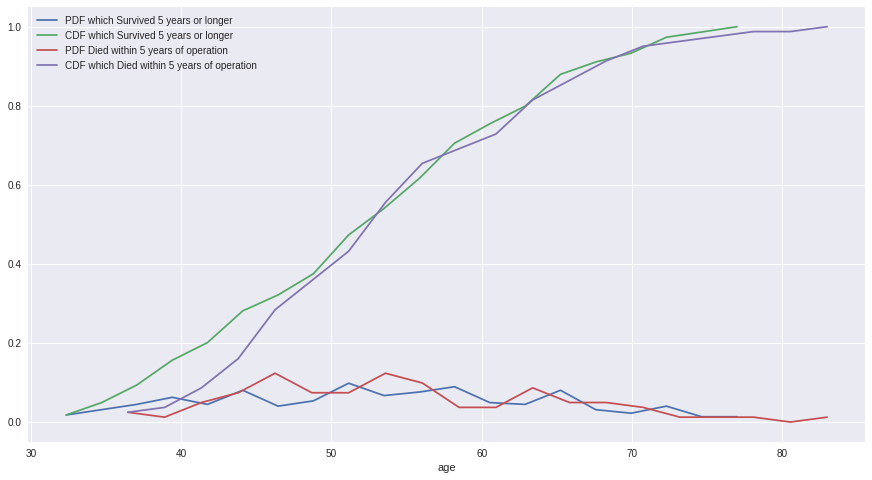

In [24]:
plt.figure(figsize=(15,8))
# (b) Plot of CDF and PDF of age for two classes.

# Survived 5 years or longer 
counts, bin_edges = np.histogram(survived['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = "PDF which Survived 5 years or longer ")
plt.plot(bin_edges[1:], cdf, label = "CDF which Survived 5 years or longer ")


# Died within 5 years of operation
counts, bin_edges = np.histogram(died['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "PDF Died within 5 years of operation")
plt.plot(bin_edges[1:], cdf, label = "CDF which Died within 5 years of operation")
plt.legend(loc = 'best')
plt.xlabel("age")

plt.show();

Observation: To be more specific with the age, patients having age less than 38 will be live longer than 5 years

[0.10714286 0.08035714 0.         0.10714286 0.         0.10267857
 0.         0.07142857 0.         0.09821429 0.09821429 0.
 0.06696429 0.         0.09821429 0.         0.09375    0.
 0.04464286 0.03125   ]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]
[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[34.   36.45 38.9  41.35 43.8  46.25 48.7  51.15 53.6  56.05 58.5  60.95
 63.4  65.85 68.3  70.75 73.2  75.65 78.1  80.55 83.  ]


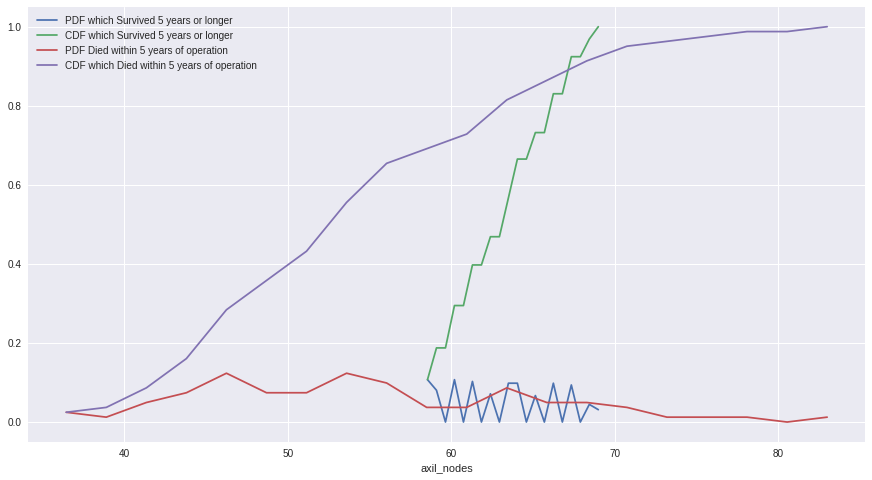

In [23]:
plt.figure(figsize=(15,8))
# (c) Plot of CDF and PDF of operation_year for two classes.

# Survived 5 years or longer 
counts, bin_edges = np.histogram(survived['operation_year'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = "PDF which Survived 5 years or longer ")
plt.plot(bin_edges[1:], cdf, label = "CDF which Survived 5 years or longer ")


# Died within 5 years of operation
counts, bin_edges = np.histogram(died['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "PDF Died within 5 years of operation")
plt.plot(bin_edges[1:], cdf, label = "CDF which Died within 5 years of operation")
plt.legend(loc = 'best')
plt.xlabel("axil_nodes")

plt.show();

Observation: Pateints having age  between 60 to 67 will be live longer

**Mean, Variance and Std-dev**

In [25]:
# Selecting Age Columns for Statsitics analysis

print("Means:")
print(np.mean(survived["age"]))
print(np.mean(died["age"]))

print("\nStd-dev:");
print(np.std(survived["age"]))
print(np.std(died["age"]))

Means:
52.11607142857143
53.67901234567901

Std-dev:
10.913004640364278
10.104182193031312


In [26]:
#Mean, Std-deviation of axil_nodes
print("Means:")
print(np.mean(survived["axil_nodes"]))
print(np.mean(died["axil_nodes"]))

print("\nStd-dev:");
print(np.std(survived["axil_nodes"]))
print(np.std(died["axil_nodes"]))

Means:
2.799107142857143
7.45679012345679

Std-dev:
5.869092706952764
9.128776076761635


In [27]:
#Mean, Std-deviation of operation_year
print("Means:")
print(np.mean(survived["operation_year"]))
print(np.mean(died["operation_year"]))

print("\nStd-dev:");
print(np.std(survived["operation_year"]))
print(np.std(died["operation_year"]))

Means:
62.857142857142854
62.82716049382716

Std-dev:
3.222014517506153
3.3214236255207887


Observation: 1.The mean age of patients who Survived 5 years or longer is approximately 52 years.
The mean age of patients who Died within 5 years of operation is approximately 54 years.

2.Mean of axil_nodes of patients who Survived 5 years or longer is approximately 3.
The mean of axil_nodes of patients who Died within 5 years of operation is approximately 7.

3.From Statiscal analysis for the Operation_year column , unable to draw conclusions

**BOX Plot and Whiskers**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


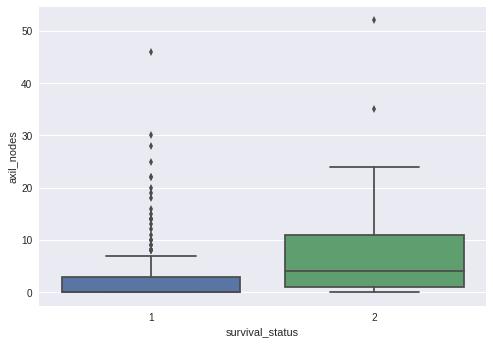

In [29]:
# 1. For Axil Nodes

sns.boxplot(x='survival_status',y='axil_nodes', data=data)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


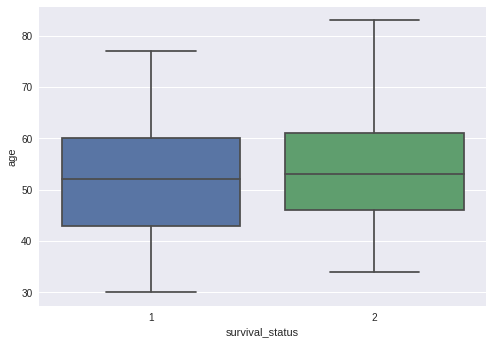

In [30]:
# 2. For age
sns.boxplot(x='survival_status',y='age', data=data)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


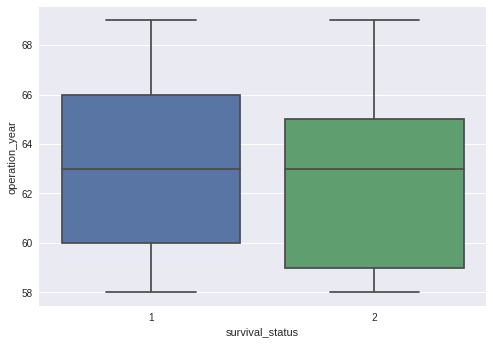

In [31]:
# 3. For Operational year

sns.boxplot(x='survival_status',y='operation_year', data=data)
plt.show()


Observation :  From the above displayed graphs, patients having age less than 34 years will live longer than the patients having age greater than 78

**Voilon Plots**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


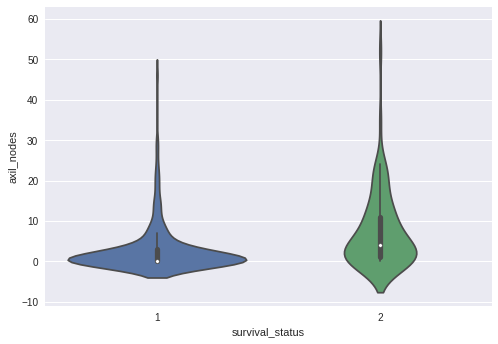

In [32]:
# Violin plot for Axil_nodes
sns.violinplot(x='survival_status',y='axil_nodes', data=data, size=8)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


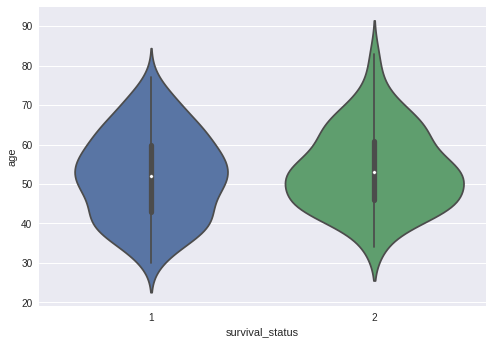

In [33]:
# Violin plot for Age

sns.violinplot(x='survival_status',y='age', data=data, size=8)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


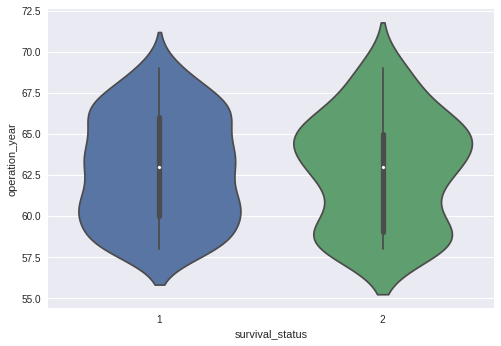

In [34]:
# Violin plot for Operation Year

sns.violinplot(x='survival_status',y='operation_year', data=data, size=8)
plt.show()

Obseravtion: Typically conveys the same information as Box-Plot

**2-D Scatter Plot**

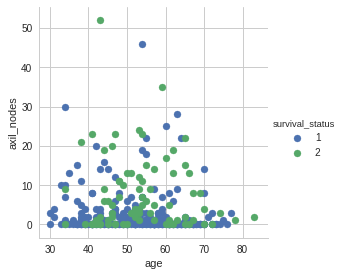

In [36]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="survival_status", size=4).map(plt.scatter, "age", "axil_nodes").add_legend();
plt.show();

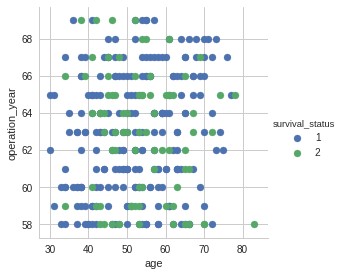

In [37]:
sns.FacetGrid(data, hue="survival_status", size=4).map(plt.scatter, "age", "operation_year").add_legend();
plt.show();

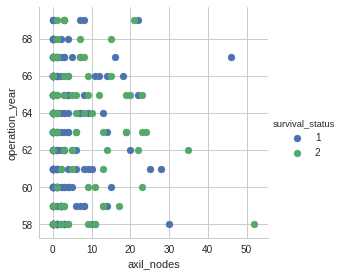

In [38]:
sns.FacetGrid(data, hue="survival_status", size=4).map(plt.scatter, "axil_nodes", "operation_year").add_legend();
plt.show();

Observation: Its pretty hard to draw any useful finding from scattered plots as the data poins highly interlinked.

**Pair Plot**

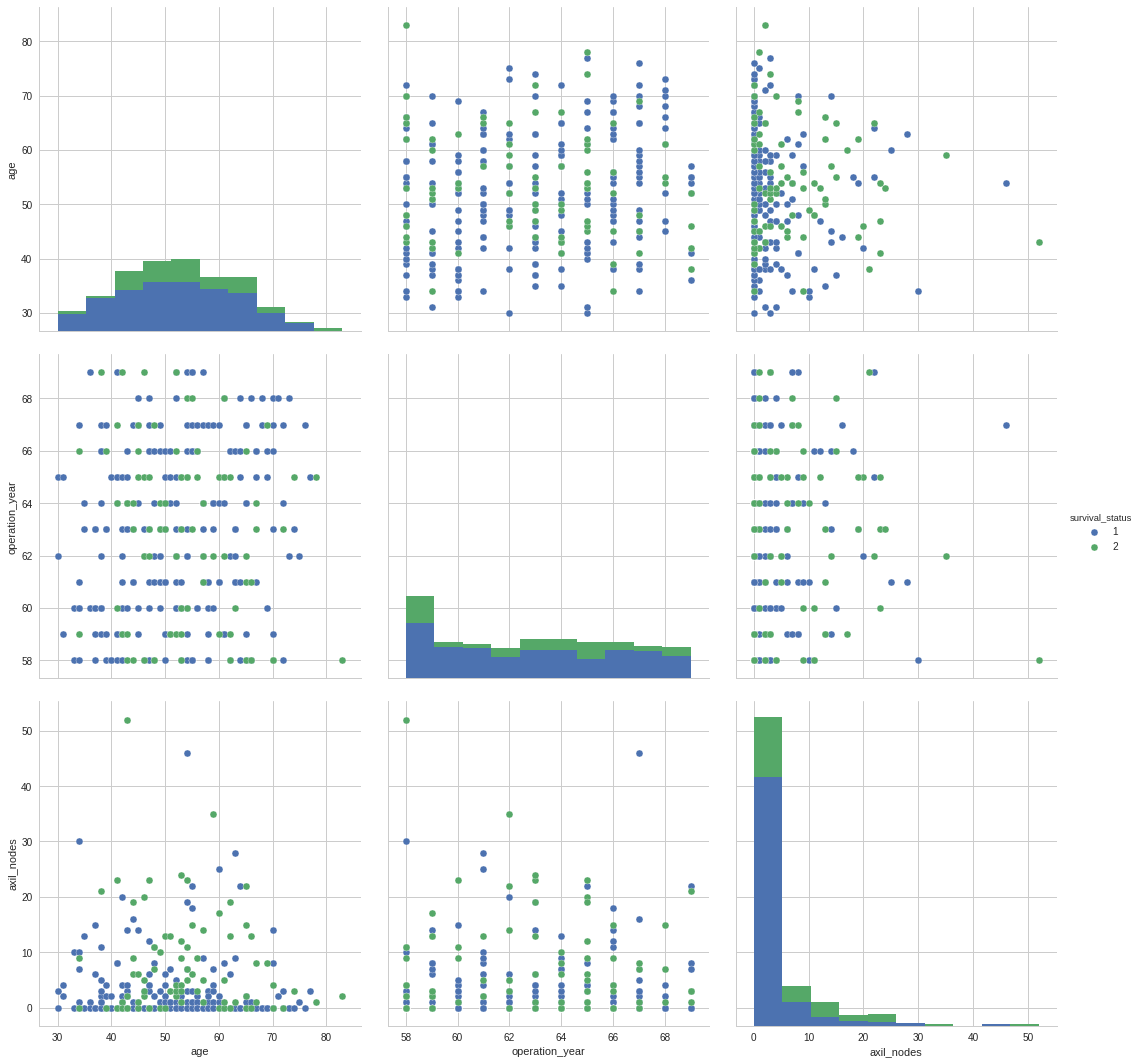

In [43]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="survival_status", vars = ['age','operation_year','axil_nodes'],size=5);
plt.show()

Observation

1. Using Pair Plot we can classify that patient of age less than 40 has survived as can be seen from pair plotting between AGE and YEAR. There are more number of blue dots for age <= 40.

**Final Obseravations:** Two features are likely to be used for a classification model age and axil node